In [9]:
!pip install dtreeviz


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import graphviz.backend as be

In [16]:
from sklearn.datasets import *
from dtreeviz.trees import *
from dtreeviz import dtreeviz
from IPython.display import Image, display_svg, SVG

In [17]:
clas = tree.DecisionTreeClassifier()  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, '

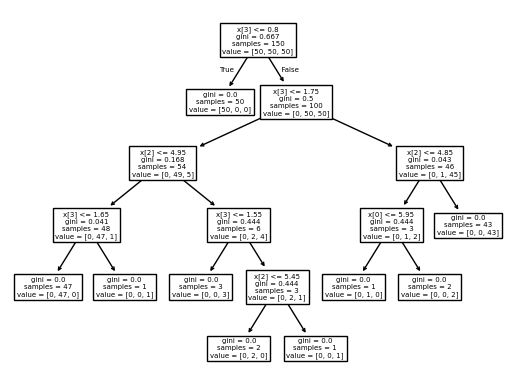

In [18]:
from sklearn.tree import plot_tree
plot_tree(clas)

# 1. Classification

In [19]:


viz = dtreeviz(clas, 
               X_train,
               y_train,
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"])
viz


C:\Users\anshm\AppData\Local\Temp\ipykernel_27248\3904361549.py:1: DeprecationWarning: dtreeviz() function is deprecated starting from version 2.0. 
 For the same functionality, please use this code instead: 
 m = dtreeviz.model(...) 
 m.view()


TypeError: 'int' object is not subscriptable

# 2. Regression

In [20]:
regr = tree.DecisionTreeRegressor(max_depth=1)
boston = load_boston()

X_train = boston.data
y_train = boston.target
regr.fit(X_train, y_train)

viz = dtreeviz(regr,
               X_train,
               y_train,
               target_name='price',
               feature_names=boston.feature_names,
               scale=2
              )
viz

NameError: name 'load_boston' is not defined

# 3. Horizontal Decision Tree

In [25]:
viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               scale = 1.5,
               orientation='LR')
viz

# 4. Show prediction path

In [57]:
clas = tree.DecisionTreeClassifier()  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

X = iris.data[np.random.randint(0, len(iris.data)),:]

viz = dtreeviz(clas, 
               X_train,
               y_train,
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               X=X)
viz

In [56]:
X

# 5. Show node number

In [58]:

viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               histtype= 'barstacked',
               scale = 1.5,
               orientation='LR',
               show_node_labels=True)
viz

# 6. Without Any graphs

In [35]:
viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               histtype= 'barstacked',
               scale = 1.5,
               orientation='LR',
               fancy=False)
viz

# 7. Show just prediction path, nothing else

In [37]:
clas = tree.DecisionTreeClassifier()  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

X = iris.data[np.random.randint(0, len(iris.data)),:]

viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               X=X,
               show_just_path=True)
viz

# 8. Prediction Path in Plain english

In [59]:
print(explain_prediction_path(clas, X, feature_names=iris.feature_names, explanation_type="plain_english"))

# 9. Feature Importance

In [60]:
print(explain_prediction_path(clas, X, feature_names=iris.feature_names, explanation_type="sklearn_default"))

# 10. Univariate Regression

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *

df_cars = pd.read_csv("cars.csv")
X, y = df_cars[['WGT']], df_cars['MPG']

dt = DecisionTreeRegressor(max_depth=3, criterion="mae")
dt.fit(X, y)

fig = plt.figure()
ax = fig.gca()
rtreeviz_univar(dt, X, y, 'WGT', 'MPG', ax=ax)
plt.show()

# 11. 3-D Regression 

In [40]:
df_cars = pd.read_csv("cars.csv")

df_cars

In [41]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *


X = df_cars[['WGT','ENG']]
y = df_cars['MPG']

dt = DecisionTreeRegressor(max_depth=3, criterion="mae")
dt.fit(X, y)

figsize = (6,5)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')

t = rtreeviz_bivar_3D(dt,
                      X, y,
                      feature_names=['Vehicle Weight', 'Horse Power'],
                      target_name='MPG',
                      fontsize=14,
                      elev=20,
                      azim=25,
                      dist=8.2,
                      show={'splits','title'},
                      ax=ax)
plt.show()